In [2]:
import torch
import torchvision
import torch.nn as nn

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## PyTorch: Tensors

In [3]:
A = torch.tensor([[1, 2], [4, -3]])
B = torch.tensor([[3, 1], [-2, 3]])

print("A:")
print(A)

print('\n')

print("B:")
print(B)

A:
tensor([[ 1,  2],
        [ 4, -3]])


B:
tensor([[ 3,  1],
        [-2,  3]])


In [4]:
print("Sum of A and B:")
print(torch.add(A, B))

print('\n')

print("Elementwise product of A and B:")
print(torch.mul(A, B))

print('\n')

print("Matrix product of A and B:")
print(torch.matmul(A, B))

print('\n')

print("Transposition of A:")
print(torch.t(A))

print('\n')

print("Concatenation of A and B in the 0th dimension:")
print(torch.cat((A, B), dim=0))

print('\n')

print("Concatenation of A and B in the 1st dimension:")
print(torch.cat((A, B), dim=1))

Sum of A and B:
tensor([[4, 3],
        [2, 0]])


Elementwise product of A and B:
tensor([[ 3,  2],
        [-8, -9]])


Matrix product of A and B:
tensor([[-1,  7],
        [18, -5]])


Transposition of A:
tensor([[ 1,  4],
        [ 2, -3]])


Concatenation of A and B in the 0th dimension:
tensor([[ 1,  2],
        [ 4, -3],
        [ 3,  1],
        [-2,  3]])


Concatenation of A and B in the 1st dimension:
tensor([[ 1,  2,  3,  1],
        [ 4, -3, -2,  3]])


In [5]:
print("3x4x5 Tensor of Zeros:")
print(torch.zeros(3, 4, 5))

print('\n')

print("5x5 Tensor with random elements sampled from a standard normal distrubtion:")
print(torch.randn(5, 5))

print('\n')

print("Tensor created from a range:")
print(torch.arange(10))

3x4x5 Tensor of Zeros:
tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])


5x5 Tensor with random elements sampled from a standard normal distrubtion:
tensor([[-0.4030,  1.1286, -0.5389, -0.7332, -0.3291],
        [-0.4189,  0.0940, -1.1133,  1.2029, -0.6242],
        [ 0.7535,  0.7316, -1.2710, -0.1309, -2.5652],
        [-0.0093,  0.4725,  1.6715,  1.3310, -1.0416],
        [ 0.0298,  3.0115,  1.1750, -1.3155,  0.6055]])


Tensor created from a range:
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


$$\frac{1}{2} \cdot \sqrt{\pi} \approx 0.8862 .$$

In [6]:
val = torch.arange(100).float()
five = 0.5*torch.ones(100)
val = torch.add(val, five)**2
val = -val
val = np.exp(val)
val = sum(val)
print(val)

tensor(0.8861)


## PyTorch: Autograd

In [7]:
a = torch.tensor([1, 2], dtype=torch.float, requires_grad=True)
b = torch.tensor([8, 3], dtype=torch.float, requires_grad=True)

c = a + b

In [8]:
c.requires_grad

True

In [9]:
c.grad_fn

In [10]:
c.grad_fn.next_functions

((<AccumulateGrad at 0x10cad7550>, 0), (<AccumulateGrad at 0x10cad7898>, 0))

In [11]:
print(c.grad_fn.next_functions[0][0].variable)
print(c.grad_fn.next_functions[1][0].variable)

tensor([1., 2.], requires_grad=True)
tensor([8., 3.], requires_grad=True)


## PyTorch: Modules and Parameters

In [12]:
class LogisticRegression(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.weight = nn.Parameter(torch.randn(10))
        self.bias = nn.Parameter(torch.randn(1))
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, vector):
        return self.sigmoid(torch.dot(vector, self.weight) + self.bias)
        

In [13]:
module = LogisticRegression()
vector = torch.randn(10)
output = module(vector)

In [14]:
output

tensor([0.3474], grad_fn=<SigmoidBackward>)

In [15]:
loss = (output - 1) ** 2

In [16]:
loss

tensor([0.4259], grad_fn=<PowBackward0>)

In [17]:
loss.backward()

In [18]:
print(module.weight.grad)
print(module.bias.grad)

tensor([ 0.2329,  0.1653, -0.5910, -0.4349, -0.0289,  0.0607,  0.0750,  0.0820,
        -0.4324, -0.0086])
tensor([-0.2959])


## Fully-connected Networks for Image Classification

In [19]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
trainset = [(np.asarray(image) / 256, label) for image, label in trainset]
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4096, shuffle=True)

val_and_test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)
val_and_test_set = [(np.asarray(image) / 256, label) for image, label in val_and_test_set]

valset = val_and_test_set[:5000]
valset = (
    torch.stack([torch.tensor(pair[0]) for pair in valset]),
    torch.tensor([pair[1] for pair in valset])
)
testset = val_and_test_set[5000:]
testset = (
    torch.stack([torch.tensor(pair[0]) for pair in testset]),
    torch.tensor([pair[1] for pair in testset])
)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


CIFAR-10 consists of 32 x 32 color images, each corresponding to a unique class indicating the object present within the image.

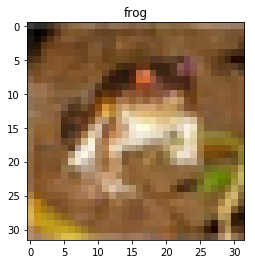

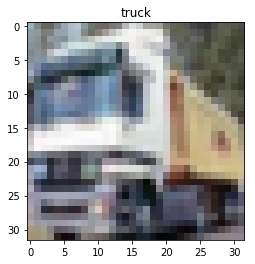

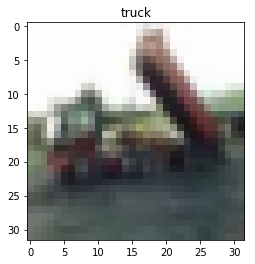

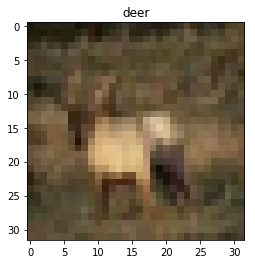

In [20]:
for image, label in trainset[:4]:
    plt.title(classes[label])
    plt.imshow(image)
    plt.show()

In [21]:
class NeuralNet(nn.Module):
    
    def __init__(self, layer_sizes):
        
        super().__init__()
        self.bias = nn.Parameter(torch.ones(1))
        self.function1 = nn.Linear(layer_sizes[0],layer_sizes[1])
        self.relu = nn.ReLU()
        self.function2 = nn.Linear(layer_sizes[1], layer_sizes[2])
        
    def forward(self, image):
        output = self.function1(image)
        output = self.relu(output)
        output = self.function2(output)
        #output = nn.Softmax(output)
        return output + self.bias
        

In [ ]:
def reshape(images):
    '''
    Reshapes a set of images of the shape (batch_size, width, height, channels)
    into the proper shape (batch_size, width * height * channels) that the model can accept.
    '''
    return images.reshape(images.shape[0], -1).float()
    

In [ ]:
EPOCHS = 20
LEARNING_RATE = .001
HIDDEN_LAYER_SIZES = [32 * 32 * 3, 500, 10]

net = NeuralNet(HIDDEN_LAYER_SIZES)
optimizer = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE)
loss_fn = nn.CrossEntropyLoss()

print(net)

for epoch in range(EPOCHS):
    
    average_loss = 0
    
    for images, labels in trainloader:
        
        images = reshape(images)
        output = net(images)
        loss = loss_fn(output, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        average_loss += loss.item()
        
    average_loss /= len(trainloader)
    
    val_output = net(reshape(valset[0]))
    val_loss = loss_fn(val_output, valset[1]).item()
    
    print("(epoch, train_loss, val_loss) = ({0}, {1}, {2})".format(epoch, average_loss, val_loss))


NeuralNet(
  (function1): Linear(in_features=3072, out_features=500, bias=True)
  (relu): ReLU()
  (function2): Linear(in_features=500, out_features=10, bias=True)
)
(epoch, train_loss, val_loss) = (0, 2.3928314172304592, 2.1268856525421143)
(epoch, train_loss, val_loss) = (1, 2.068721734560453, 1.9980486631393433)
(epoch, train_loss, val_loss) = (2, 1.9564658403396606, 1.9071797132492065)
(epoch, train_loss, val_loss) = (3, 1.8880710693506093, 1.859283447265625)
(epoch, train_loss, val_loss) = (4, 1.8410643981053278, 1.8338984251022339)
(epoch, train_loss, val_loss) = (5, 1.8149992410953228, 1.8066388368606567)
(epoch, train_loss, val_loss) = (6, 1.7901686063179603, 1.7764228582382202)
(epoch, train_loss, val_loss) = (7, 1.7671649914521437, 1.7499693632125854)
(epoch, train_loss, val_loss) = (8, 1.7391028037438025, 1.7413963079452515)
(epoch, train_loss, val_loss) = (9, 1.7258512882085948, 1.7196005582809448)
(epoch, train_loss, val_loss) = (10, 1.7061066169005175, 1.7019997835159302)

In [ ]:
test_output = net(reshape(testset[0]))
test_maxes = torch.argmax(test_output, dim=1)
print("Test accuracy:", torch.sum(test_maxes == testset[1]).item() / float(test_maxes.shape[0]))